<a href="https://colab.research.google.com/github/Shohjahon02/first_my_git/blob/main/05_ml_07_LinerRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning. 

### Linear Regression

In [66]:
import numpy as np


In [3]:
import pandas as pd
df = pd.read_csv('uy_data1.csv', index_col=0)
# df.drop('location', inplace=True)
df.head(10)

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3.0,57.0,4.0,4.0,52000.0
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2.0,52.0,4.0,5.0,56000.0
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2.0,42.0,4.0,4.0,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3.0,65.0,1.0,4.0,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3.0,70.0,3.0,5.0,55000.0
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1.0,28.0,1.0,4.0,25500.0
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1.0,30.0,2.0,4.0,21200.0
7,"город Ташкент, Яккасарайский район, Саламатина",Яккасарайский,2.0,32.0,5.0,5.0,20000.0
8,"город Ташкент, Учтепинский район, Чиланзар-21",Учтепинский,2.0,51.0,3.0,4.0,26200.0
9,"город Ташкент, Чиланзарский район, Чиланзар-8",Чиланзарский,1.0,30.0,1.0,4.0,22200.0


In [4]:
df.drop('location',axis=1, inplace=True)
df.head()

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3.0,57.0,4.0,4.0,52000.0
1,Яккасарайский,2.0,52.0,4.0,5.0,56000.0
2,Чиланзарский,2.0,42.0,4.0,4.0,37000.0
3,Чиланзарский,3.0,65.0,1.0,4.0,49500.0
4,Чиланзарский,3.0,70.0,3.0,5.0,55000.0


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7410 entries, 0 to 4089
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   district    7409 non-null   object 
 1   rooms       7409 non-null   float64
 2   size        7409 non-null   float64
 3   level       7409 non-null   float64
 4   max_levels  7409 non-null   float64
 5   price       7410 non-null   float64
dtypes: float64(5), object(1)
memory usage: 405.2+ KB


In [5]:
df['district'].value_counts()

Чиланзарский         1626
Мирзо-Улугбекский    1358
Юнусабадский          871
Учтепинский           870
Мирабадский           761
Яккасарайский         646
Яшнободский           461
Шайхантахурский       371
Олмазорский           264
Сергелийский          159
Янгихаётский           14
Бектемирский            8
Name: district, dtype: int64

**Darsimiz uchun Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz**

In [83]:
housing = df[df.district=='Чиланзарский']
# housing.drop([6612, 6613], inplace=True)
housing.loc[6612, 'size'] = 225
housing.loc[6613, 'size'] = 225

housing.loc[6612]
housing.loc[6613]

district      Чиланзарский
rooms                  8.0
size                 225.0
level                  9.0
max_levels            10.0
price              96000.0
Name: 6613, dtype: object

In [84]:
idx = housing[housing['price']>175000].index
housing = housing.drop(idx, axis=0)

In [70]:
idx2 = housing[housing['price']<25000].index
housing = housing.drop(idx, axis=0)

In [94]:
idx3 = housing[housing['size']<24].index
# idx3.loc[5811, 'size'] = 25
idx3
housing = housing.drop(idx3, axis=0)

In [85]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7504    70.0
7522    20.0
7533    32.0
7545    70.0
7564    30.0
Name: size, Length: 1613, dtype: float64

In [86]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7504    48000.0
7522    18500.0
7533    28000.0
7545    49800.0
7564    22914.0
Name: price, Length: 1613, dtype: float64

**Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.**

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

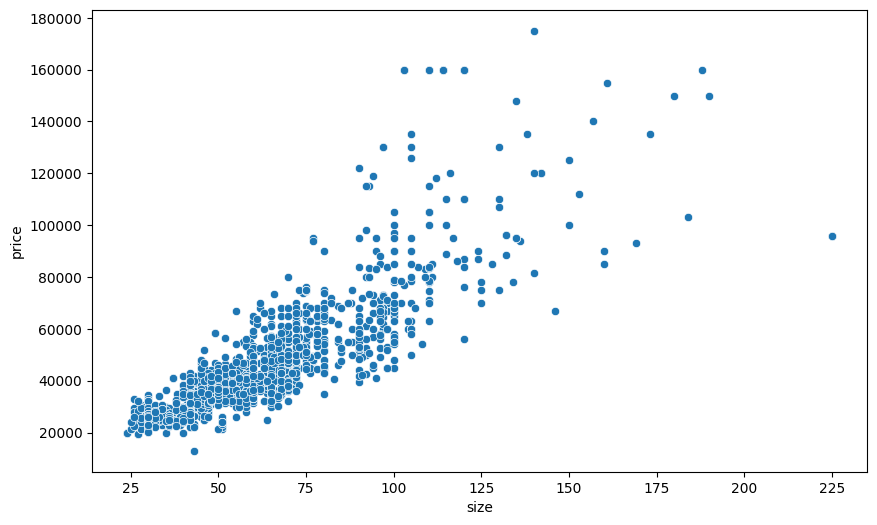

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

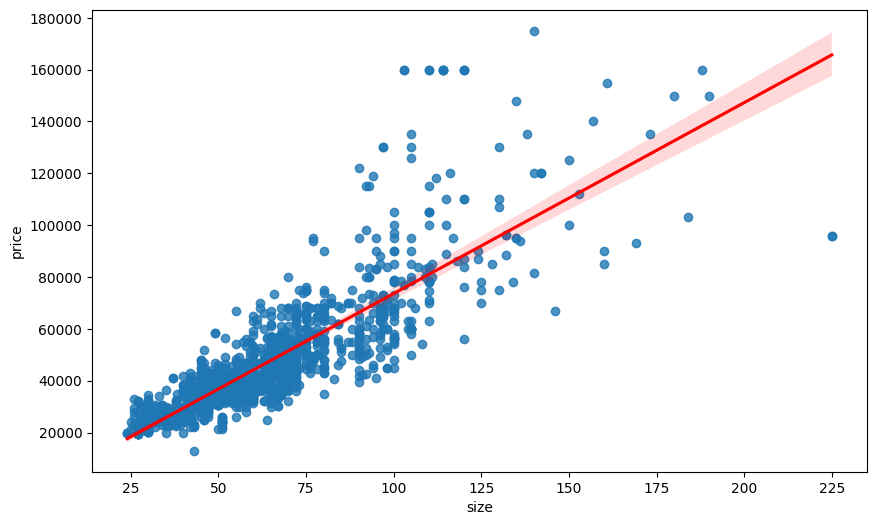

In [96]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [103]:
Xmean = np.mean(X)
Ymean = np.mean(y)

In [111]:
tilda1 = sum((X-Xmean)*(y-Ymean)) / sum(pow(X-Xmean, 2))
tilda1

735.3921400514312

In [114]:
tilda0 = Ymean - tilda1 * Xmean
tilda0

56.45022771840013

In [100]:
print(X.mean(), y.mean())

61.73965282083075 45459.3056416615


## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [128]:
x1 = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x1=}")
y1 = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y1=}")

x1=array([ 24., 102.,  42.,  54.,  40.,  66.,  73.,  28.,  38.,  46.])
y1=array([20000., 78500., 36800., 37500., 28500., 47000., 66200., 23999.,
       32000., 32000.])


In [129]:
h = tilda0 + tilda1 * x1
h

array([17705.86158895, 75066.44851296, 30942.92010988, 39767.6257905 ,
       29472.13582978, 48592.33147111, 53740.07645147, 20647.43014916,
       28001.35154967, 33884.48867008])

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [130]:
mae = sum(abs(h-y1)) / len(y1)
mae

3811.1493399368637

In [131]:
rmse = np.sqrt(sum(pow(abs(h-y1), 2)) / len(y1))
rmse

4959.875283621297

In [132]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(y1, h)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4959.875283621297


1.   Keraksiz ma'lumotlarni o'chirish kerak

2.   Documentlarni ko'rib chiqish kerak

3.   Amaliyot